In [ ]:
# !pip install pytesseract

In [ ]:
# !sudo apt install tesseract-ocr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# from google.colab import drive
import pytesseract 

In [ ]:
#drive.mount('/content/drive')

In [ ]:
# !sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !sudo apt-get update -qq 2>&1 > /dev/null
# !sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
# !google-drive-ocamlfuse

In [ ]:
# !sudo apt-get install -qq w3m # to act as web browser 
# !xdg-settings set default-web-browser w3m.desktop # to set default browser
# %cd /content
# !mkdir drive
# %cd drive
# !mkdir MyDrive
# %cd ..
# %cd ..
# !google-drive-ocamlfuse /content/drive/MyDrive

In [7]:
model = load_model('../MODEL/bounding_box_segmentation_5.h5')

1/1 [==============================] - 0s 44ms/step
(512, 512)


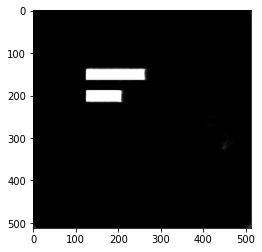

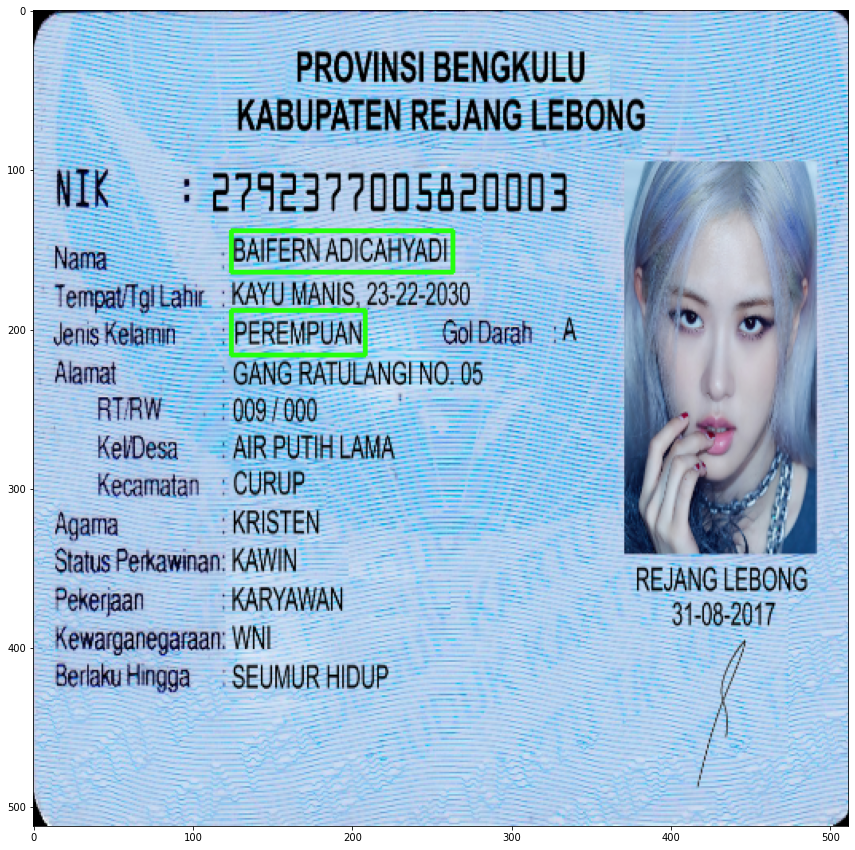

In [30]:
#Prediction.
file_test='../DATASET/Data_KTP/image/Ori 8.png'
img=cv2.imread(file_test,0)
ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
img=cv2.resize(img,(512,512))
img=np.expand_dims(img,axis=-1)
img=img/255

img=np.expand_dims(img,axis=0)
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')
plt.imsave('test_img_mask.png',pred)

img = cv2.imread('test_img_mask.png',0) 
print(img.shape)
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
ori_img = cv2.imread(file_test)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
ori_img = cv2.resize(ori_img, (512,512))

roi_img = []

roi_number = 0
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key = lambda x: cv2.boundingRect(x)[0] + cv2.boundingRect(x)[1] * img.shape[1])
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w > 30:
    # draw a white rectangle to visualize the bounding rect
      cv2.rectangle(ori_img, (x, y), (x + w, y + h), (36,255,12), 2)
      ROI = ori_img[y:y+h, x:x+w]
      roi_img.append(ROI)
      # cv2.imwrite('/content/test_{}.png'.format(roi_number), ROI)
      roi_number += 1
    #coordinates.append([x,y,(x+w),(y+h)])

#cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

plt.figure(figsize=(20,15))
plt.imshow(ori_img)
plt.show()

In [31]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

if len(roi_img)>1:
  nama = pytesseract.image_to_string(roi_img[0], lang ='eng', config='--psm 7')
  print("Nama: ", nama)
  jenis_kelamin = pytesseract.image_to_string(roi_img[1], lang ='eng', config='--psm 7')
  print("Jenis Kelamin: ", jenis_kelamin)

elif len(roi_img)==1:
  text = pytesseract.image_to_string(roi_img[0], lang ='eng', config='--psm 7')
  print(text)
else:
  print("none")


Nama:  BAIFERN ADICAHYADI

Jenis Kelamin:  PEREMPUAN

